In [0]:
!ls

sample_data


In [0]:
from google.colab import files

uploaded = files.upload()

Saving final.zip to final.zip


In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['final.zip']), 'r')
data.extractall()

In [0]:
data.printdir()

File Name                                             Modified             Size
final/airplanes/                               2019-02-21 13:32:04            0
final/airplanes/image_0002.jpg                 2004-11-09 11:59:06         8181
final/airplanes/image_0003.jpg                 2004-11-09 11:59:06        11741
final/airplanes/image_0004.jpg                 2004-11-09 11:58:54        15700
final/airplanes/image_0005.jpg                 2004-11-09 11:58:54        14356
final/airplanes/image_0007.jpg                 2004-11-09 11:58:54         9596
final/airplanes/image_0008.jpg                 2004-11-09 11:58:54        13896
final/airplanes/image_0009.jpg                 2004-11-09 11:59:06        10865
final/airplanes/image_0010.jpg                 2004-11-09 11:58:54         8378
final/airplanes/image_0011.jpg                 2004-11-09 11:58:54        10417
final/airplanes/image_0012.jpg                 2004-11-09 11:58:54         6418
final/airplanes/image_0013.jpg          

In [0]:
import os
train_data_dir = 'final'  

target_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]
nb_train_samples = sum([len(files) for _, _, files in os.walk(train_data_dir)])  

nb_classes = len(target_names)

In [0]:
print('Training a CNN Multi-Classifier Model ......')
print('\n - names of classes: ', target_names, '\n - # of classes: ', nb_classes)
print(' - # of trained samples: ', nb_train_samples)

Training a CNN Multi-Classifier Model ......

 - names of classes:  ['grand_piano', 'schooner', 'revolver', 'watch', 'ewer', 'buddha', 'stop_sign', 'yin_yang', 'soccer_ball', 'umbrella', 'flamingo', 'starfish', 'sunflower', 'helicopter', 'kangaroo', 'euphonium', 'crab', 'Leopards', 'ferry', 'minaret', 'bonsai', 'BACKGROUND_Google', 'laptop', 'ketch', 'dalmatian', 'butterfly', 'Motorbikes', 'chandelier', 'joshua_tree', 'electric_guitar', 'airplanes', 'hawksbill', 'lamp', 'crayfish', 'cougar_face', 'dolphin', 'llama', 'Faces_easy', 'dragonfly', 'menorah', 'ibis', 'trilobite', 'elephant', 'scorpion', 'lotus', 'brain', 'Faces', 'chair', 'car_side'] 
 - # of classes:  49
 - # of trained samples:  5367


In [0]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

import tensorflow as tf
import keras
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras import backend as K  

img_height,img_width=64,64


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (img_height,img_width,3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.1))


# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Dropout(0.1))


classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Dropout(0.1))



classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Dropout(0.2))

classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Dropout(0.2))
             

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 1024, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(output_dim = 49, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=10.,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.,
                                    zoom_range=.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,validation_split=0.1)

training_set = train_datagen.flow_from_directory('final',
                                                 target_size = (img_width, img_height),
                                                 batch_size = 10,
                                                 class_mode = 'categorical',subset='training')

validation_generator = train_datagen.flow_from_directory('final',
                                            target_size = (img_width, img_height),
                                            batch_size = 10,
                                            class_mode = 'categorical',subset='validation')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", unit

Found 4850 images belonging to 49 classes.
Found 516 images belonging to 49 classes.


In [0]:
history=classifier.fit_generator(training_set,
                         samples_per_epoch = 4850 ,
                         nb_epoch = 75,
                         validation_data = validation_generator,
                         nb_val_samples = 516 )

Epoch 1/150
  1/485 [..............................] - ETA: 1:17 - loss: 0.9952 - acc: 0.7000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=485, epochs=150, validation_steps=516)`
  """


485/485 [==============================] - 74s 152ms/step - loss: 1.3221 - acc: 0.6287 - val_loss: 1.4604 - val_acc: 0.6098
Epoch 2/150
485/485 [==============================] - 73s 152ms/step - loss: 1.3284 - acc: 0.6346 - val_loss: 1.4765 - val_acc: 0.6051
Epoch 3/150
485/485 [==============================] - 74s 152ms/step - loss: 1.3210 - acc: 0.6318 - val_loss: 1.4508 - val_acc: 0.6207
Epoch 4/150
485/485 [==============================] - 74s 152ms/step - loss: 1.3234 - acc: 0.6328 - val_loss: 1.5487 - val_acc: 0.5877
Epoch 5/150
485/485 [==============================] - 74s 152ms/step - loss: 1.3235 - acc: 0.6289 - val_loss: 1.4709 - val_acc: 0.6102
Epoch 6/150
485/485 [==============================] - 73s 151ms/step - loss: 1.3148 - acc: 0.6276 - val_loss: 1.4314 - val_acc: 0.6125
Epoch 7/150
485/485 [==============================] - 74s 153ms/step - loss: 1.3187 - acc: 0.6330 - val_loss: 1.5486 - val_acc: 0.5908
Epoch 8/150
485/485 [==============================] - 74s 1

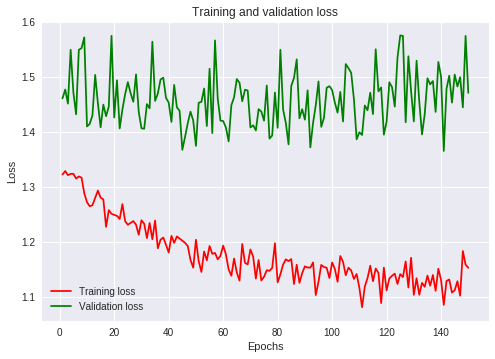

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

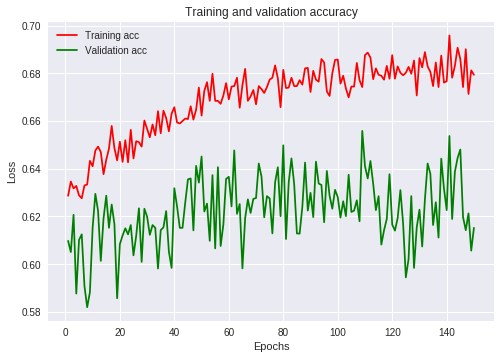

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
__________

In [0]:
!ls

101_ObjectCategories  aero.jpg	sample_data  sample.zip


In [0]:
from google.colab import files

uploaded = files.upload()

Saving star.jpg to star.jpg


starfish


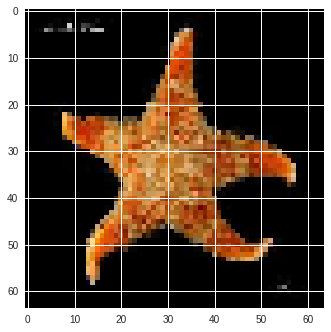

In [0]:
img_path = 'star.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.
plt.imshow(img_tensor[0])
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])



classes = classifier.predict_classes(images)
classes=int(classes)
   
print(target_names[classes])

In [0]:
model_json = classifier.to_json()
with open("model49.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
classifier.save_weights("model49.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
!ls


sample_data
